In [46]:
import numpy as np
import joblib as jl

from lib import matnpy
from lib.vae import vae, logging
from lib.wavelet_utilities import wavelet_transform

In [2]:
import mne

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mne.datasets import sample
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

print(__doc__)

Automatically created module for IPython interactive environment


# Brain info

In [5]:
from lib.matnpy.utilities.brain_info import *

In [6]:
print(CORTEX_TO_AREAS['Parietal'])

['AIP', 'LIP', 'MIP', 'PIP', 'TPt', 'VIP', 'a23', 'a5', 'a7A', 'a7B', 'a7M', 'a7op']


In [7]:
print(CORTEX_TO_AREAS['Visual'])

['DP', 'FST', 'MST', 'MT', 'TEpd', 'V1', 'V2', 'V3', 'V3A', 'V4', 'V4t', 'V6A']


In [8]:
print(CORTEX_TO_AREAS['Motor'])

['F1', 'F2', 'F6', 'F7']


In [9]:
print(CORTEX_TO_AREAS['Temporal'])

['Ins', 'STPc']


In [10]:
print(CORTEX_TO_AREAS['Prefrontal'])

['OPRO', 'a11', 'a12', 'a13', 'a14', 'a24D', 'a24c', 'a32', 'a44', 'a45A', 'a45B', 'a46D', 'a46V', 'a8B', 'a8L', 'a8M', 'a8r', 'a9/46D', 'a9/46V']


In [11]:
print(CORTEX_TO_AREAS['Somatosensory'])

['SII', 'a1', 'a2', 'a3']


<img src="https://www.researchgate.net/profile/Nicholas_Dotson/publication/320638757/figure/fig6/AS:661716752949252@1534776976575/Summary-of-Recording-Performance-A-Flat-map-of-the-cortex-taken-from-Markov-et-al.png">

# Gray/Dotson data (a7A)

In [12]:
a7A_data_loader_parameters = {
    'dataset_path': 'C:/Users/lauri/Desktop/Stage-M1-Apprentissage/GrayDataEduardo/lucy/',
    'session_number': '141126',
    'session_index': '01',
    'align_on': 'sample_on',
    'from_time': -1000,
    'to_time': 2000,
    'target_areas': ['a7A'],
    'target_cortices': None,  # Ex: 'Visual'
    'electrode_type': 'grid',  # any one of single|grid|average  
    'decode_for': 'stimulus',
    'load_only_correct_trials': True,    
    'one_hot': False,
    'normalize_data': True,
}

In [13]:
import os 
os.listdir('./lucy/')

['141126']

In [14]:
a7A_data, a7A_targets, responses = matnpy.load(**a7A_data_loader_parameters)

Loaded Trials:
	14112601.0001.mat,	14112601.0002.mat,	14112601.0003.mat,	14112601.0004.mat,
	14112601.0005.mat,	14112601.0006.mat,	14112601.0007.mat,	14112601.0008.mat,
	14112601.0009.mat,	14112601.0010.mat,	14112601.0011.mat,	14112601.0012.mat,
	14112601.0013.mat,	14112601.0014.mat,	14112601.0015.mat,	14112601.0016.mat,
	14112601.0017.mat,	14112601.0018.mat,	14112601.0019.mat,	14112601.0020.mat,
	14112601.0021.mat,	14112601.0022.mat,	14112601.0023.mat,	14112601.0024.mat,
	14112601.0025.mat,	14112601.0026.mat,	14112601.0027.mat,	14112601.0028.mat,
	14112601.0029.mat,	14112601.0030.mat,	14112601.0031.mat,	14112601.0032.mat,
	14112601.0033.mat,	14112601.0034.mat,	14112601.0035.mat,	14112601.0036.mat,
	14112601.0037.mat,	14112601.0038.mat,	14112601.0039.mat,	14112601.0040.mat,
	14112601.0041.mat,	14112601.0042.mat,	14112601.0043.mat,	14112601.0044.mat,
	14112601.0045.mat,	14112601.0046.mat,	14112601.0047.mat,	14112601.0048.mat,
	14112601.0049.mat,	14112601.0050.mat,	14112601.0051.mat,	141

In [15]:
a7A_data.shape

(286, 1, 3000)

In [16]:
dPFC_data_loader_parameters = {
    'dataset_path': './lucy/',
    'session_number': '141126',
    'session_index': '01',
    'align_on': 'sample_on',
    'from_time': -1000,
    'to_time': 2000,
    'target_areas': ['a46D', 'a9/46D', 'a8B'],
    'target_cortices': None,  # Ex: 'Visual'
    'electrode_type': 'grid',  # any one of single|grid|average  
    'decode_for': 'stimulus',
    'load_only_correct_trials': True,    
    'one_hot': False,
    'normalize_data': True,
}

In [17]:
dPFC_data, dPFC_targets, responses = matnpy.load(**dPFC_data_loader_parameters)

Loaded Trials:
	14112601.0001.mat,	14112601.0002.mat,	14112601.0003.mat,	14112601.0004.mat,
	14112601.0005.mat,	14112601.0006.mat,	14112601.0007.mat,	14112601.0008.mat,
	14112601.0009.mat,	14112601.0010.mat,	14112601.0011.mat,	14112601.0012.mat,
	14112601.0013.mat,	14112601.0014.mat,	14112601.0015.mat,	14112601.0016.mat,
	14112601.0017.mat,	14112601.0018.mat,	14112601.0019.mat,	14112601.0020.mat,
	14112601.0021.mat,	14112601.0022.mat,	14112601.0023.mat,	14112601.0024.mat,
	14112601.0025.mat,	14112601.0026.mat,	14112601.0027.mat,	14112601.0028.mat,
	14112601.0029.mat,	14112601.0030.mat,	14112601.0031.mat,	14112601.0032.mat,
	14112601.0033.mat,	14112601.0034.mat,	14112601.0035.mat,	14112601.0036.mat,
	14112601.0037.mat,	14112601.0038.mat,	14112601.0039.mat,	14112601.0040.mat,
	14112601.0041.mat,	14112601.0042.mat,	14112601.0043.mat,	14112601.0044.mat,
	14112601.0045.mat,	14112601.0046.mat,	14112601.0047.mat,	14112601.0048.mat,
	14112601.0049.mat,	14112601.0050.mat,	14112601.0051.mat,	141

In [18]:
dPFC_data.shape

(286, 5, 3000)

In [19]:
data = np.concatenate((a7A_data, dPFC_data), axis=1)
data.shape

(286, 6, 3000)

In [20]:
targets = a7A_targets

In [21]:
targets.min()

0.0

In [22]:
data_target_1 = []
data_target_2 = []
data_target_3 = []
data_target_4 = []
data_target_5 = []
for count, target, in enumerate (targets) : 
    if target == 0. :
        data_target_1.append (data[count,:,:])
    elif target == 1.0 :
        data_target_2.append (data[count,:,:])
    elif target == 2.0 :
        data_target_3.append (data[count,:,:])
    elif target == 3.0 :
        data_target_4.append (data[count,:,:])
    elif target == 4.0 :
        data_target_5.append (data[count,:,:]) 
    

In [23]:
data_target_1 = np.array(data_target_1)
data_target_2 = np.array(data_target_2)
data_target_3 = np.array(data_target_3)
data_target_4 = np.array(data_target_4)
data_target_5 = np.array(data_target_5)

In [24]:
data_list = [data_target_1,data_target_2,data_target_3,data_target_4,data_target_5]
list_con = []
list_freqs = []
list_times = []
list_n_epochs = []
list_n_tapers = []

for count, data_target_i, in enumerate (data_list): 
    con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(data_target_i, mode='cwt_morlet', 
                                                                               fmin = 2,
                                                                               sfreq=1000, 
                                                                               #cwt_freqs = np.array([2,4,8,16,32,64,128]))
                                                                               cwt_freqs = np.arange(50))
    list_con.append (con)
    list_freqs.append(freqs)
    list_times.append(times) 
    list_n_epochs.append(n_epochs)
    list_n_tapers.append(n_tapers)
    

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 3


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11
    computing connectivity for epoch 12


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15
    computing connectivity for epoch 16


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22
    computing connectivity for epoch 23


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 26


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 39


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 50


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 51


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 52


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 53


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 54
    computing connectivity for epoch 55


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 56


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 57


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 58


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 59


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 60


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 61


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 62


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 63


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 64
    computing connectivity for epoch 65


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 66


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 67


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 68


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 3


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 12


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15
    computing connectivity for epoch 16


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 26


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31
    computing connectivity for epoch 32


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34
    computing connectivity for epoch 35


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38
    computing connectivity for epoch 39


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49
    computing connectivity for epoch 50


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 51


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 52
    computing connectivity for epoch 53


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 54


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 55


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 56


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 57


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 58


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2
    computing connectivity for epoch 3


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 12


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 16


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25
    computing connectivity for epoch 26


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29
    computing connectivity for epoch 30


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35
    computing connectivity for epoch 36


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37
    computing connectivity for epoch 38


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 39


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40
    computing connectivity for epoch 41


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2
    computing connectivity for epoch 3


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10
    computing connectivity for epoch 11


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 12
    computing connectivity for epoch 13


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 16


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20
    computing connectivity for epoch 21


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 26
    computing connectivity for epoch 27


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38
    computing connectivity for epoch 39


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 3


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4
    computing connectivity for epoch 5


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11
    computing connectivity for epoch 12


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14
    computing connectivity for epoch 15


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 16
    computing connectivity for epoch 17


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18
    computing connectivity for epoch 19


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25
    computing connectivity for epoch 26


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 39


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41
    computing connectivity for epoch 42


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 50


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 51


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 52


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 53


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 54


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 55


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 56


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 57


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 58


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 59


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 60
    computing connectivity for epoch 61


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 62


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 63


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 64


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 65


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 66


<ipython-input-24-41847d14f609>:13: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


In [25]:
plv_con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(data_target_1, mode='cwt_morlet', 
                                                                                   method = 'plv',
                                                                               fmin = 2,
                                                                               sfreq=1000, 
                                                                               #cwt_freqs = np.array([2,4,8,16,32,64,128]))
                                                                               cwt_freqs = np.arange(50))

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLV
    computing connectivity for epoch 1


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 3


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 6


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 12


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 16


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 22


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 26


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 39


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 50


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 51


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 52


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 53


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 54


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 55


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 56


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 57


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 58


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 59


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 60


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 61


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 62


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 63


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 64


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 65


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 66


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 67


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 68


<ipython-input-25-1e43d81e42ce>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


In [26]:
pli_con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(data[:,:,:], mode='cwt_morlet', 
                                                                                   method = 'pli',
                                                                               fmin = 2,
                                                                               sfreq=1000, 
                                                                               #cwt_freqs = np.array([2,4,8,16,32,64,128]))
                                                                               cwt_freqs = np.arange(50))

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 15 connections
    using t=0.000s..2.999s for estimation (3000 points)
    frequencies: 2.0Hz..49.0Hz (48 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLI
    computing connectivity for epoch 1


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 2


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 3


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 4


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 5
    computing connectivity for epoch 6


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 7


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 8


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 9


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 10


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 11


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 12


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 13


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 14


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 15


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 16


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 17


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 18


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 19


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 20


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 21
    computing connectivity for epoch 22


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 23


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 24


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 25


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 26


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 27


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 28


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 29


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 30


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 31


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 32


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 33


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 34


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 35


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 36


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 37


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 38


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 39


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 40


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 41


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 42


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 43


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 44


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 45


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 46


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 47


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 48


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 49


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 50


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 51


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 52


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 53


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 54


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 55


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 56


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 57


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 58


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 59


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 60


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 61


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 62


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 63


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 64


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 65


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 66


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 67


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 68


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 69


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 70


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 71


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 72
    computing connectivity for epoch 73


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 74


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 75


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 76


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 77


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 78


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 79


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 80


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 81


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 82


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 83


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 84


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 85


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 86


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 87


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 88


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 89


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 90


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 91


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 92


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 93


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 94
    computing connectivity for epoch 95


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 96
    computing connectivity for epoch 97


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 98


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 99


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 100


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 101


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 102


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 103


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 104


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 105
    computing connectivity for epoch 106


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 107


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 108


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 109


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 110


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 111


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 112


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 113


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 114


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 115


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 116


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 117


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 118


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 119
    computing connectivity for epoch 120


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 121


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 122


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 123


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 124


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 125


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 126


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 127


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 128


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 129


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 130


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 131


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 132


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 133


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 134


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 135


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 136
    computing connectivity for epoch 137


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 138


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 139


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 140


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 141


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 142


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 143


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 144


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 145


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 146


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 147


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 148


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 149


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 150


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 151


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 152
    computing connectivity for epoch 153


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 154


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 155


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 156


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 157


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 158


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 159


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 160


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 161
    computing connectivity for epoch 162


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 163


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 164


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 165


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 166


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 167


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 168


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 169


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 170


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 171


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 172


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 173


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 174


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 175


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 176


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 177


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 178


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 179


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 180


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 181


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 182


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 183


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 184


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 185


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 186
    computing connectivity for epoch 187


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 188


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 189


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 190


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 191


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 192


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 193
    computing connectivity for epoch 194


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 195


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 196


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 197


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 198


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 199


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 200


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 201


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 202


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 203


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 204


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 205
    computing connectivity for epoch 206


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 207


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 208


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 209


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 210


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 211


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 212


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 213


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 214


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 215


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 216


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 217


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 218


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 219


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 220
    computing connectivity for epoch 221


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 222


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 223


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 224
    computing connectivity for epoch 225


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 226
    computing connectivity for epoch 227


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 228


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 229


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 230


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 231


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 232


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 233


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 234


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 235
    computing connectivity for epoch 236


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 237


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 238


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 239


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 240


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 241


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 242


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 243


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 244


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 245


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 246


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 247


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 248


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 249


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 250


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 251


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 252
    computing connectivity for epoch 253


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 254


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 255


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 256


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 257


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 258


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 259


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 260


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 261


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 262
    computing connectivity for epoch 263


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 264


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 265


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 266


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 267


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 268


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 269


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 270
    computing connectivity for epoch 271


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 272


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 273


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 274


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 275


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 276


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 277


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 278


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 279


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 280


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 281


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 282


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 283
    computing connectivity for epoch 284


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    computing connectivity for epoch 285
    computing connectivity for epoch 286


<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))
<ipython-input-26-16698af8b8f0>:6: UserWarning: At least one of the wavelets is longer than the signal. Consider padding the signal or using shorter wavelets.
  cwt_freqs = np.arange(50))


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


In [27]:
con.shape

(6, 6, 48, 3000)

# Stimulus specific fronto-parietal coherence 

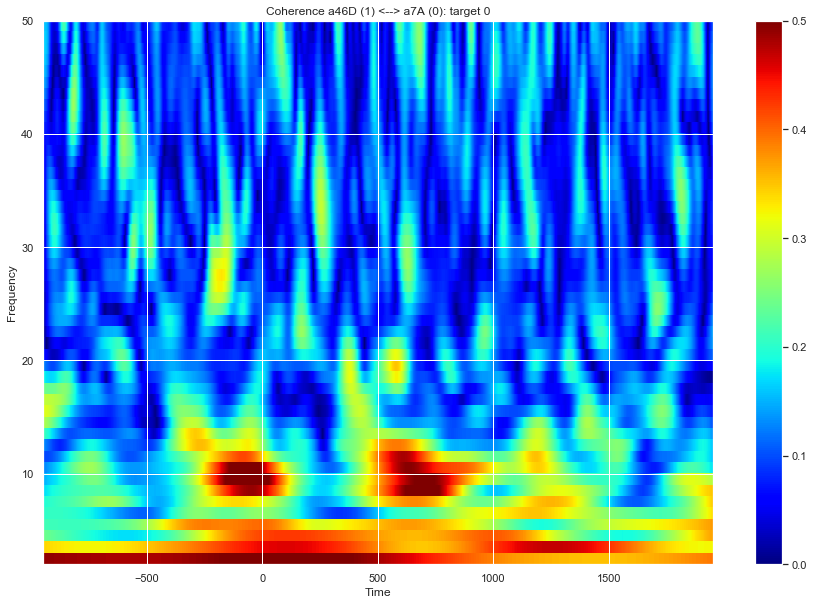

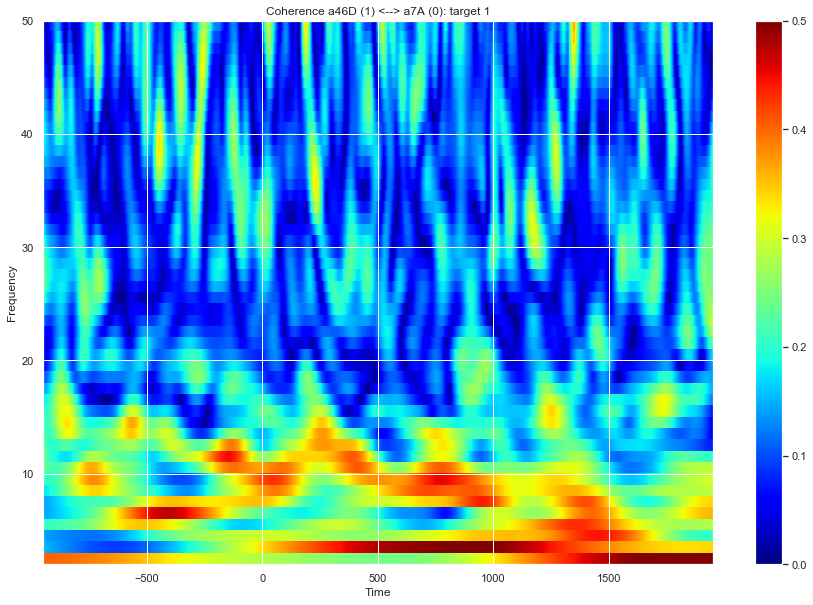

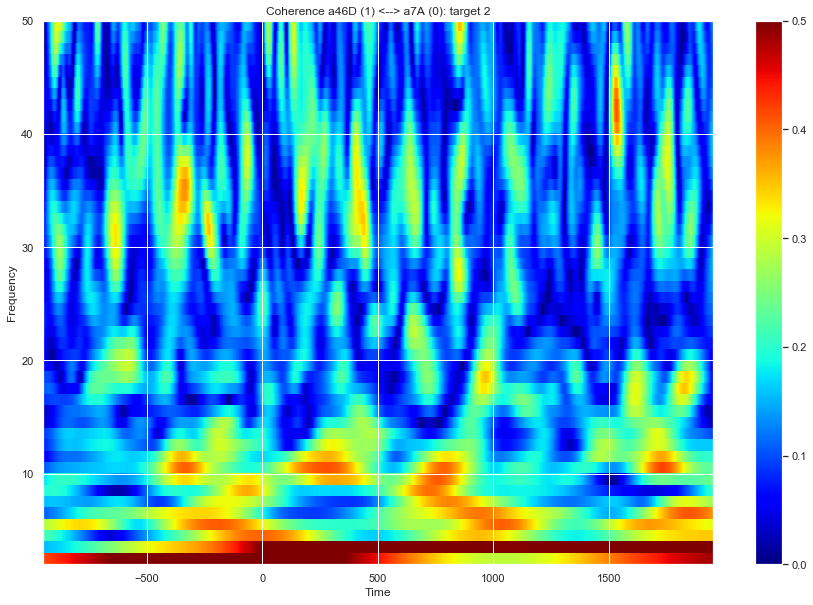

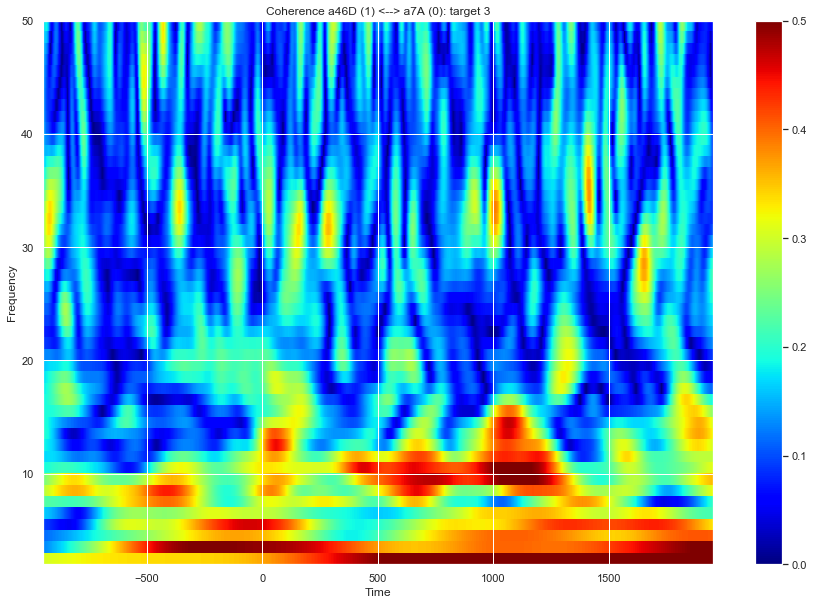

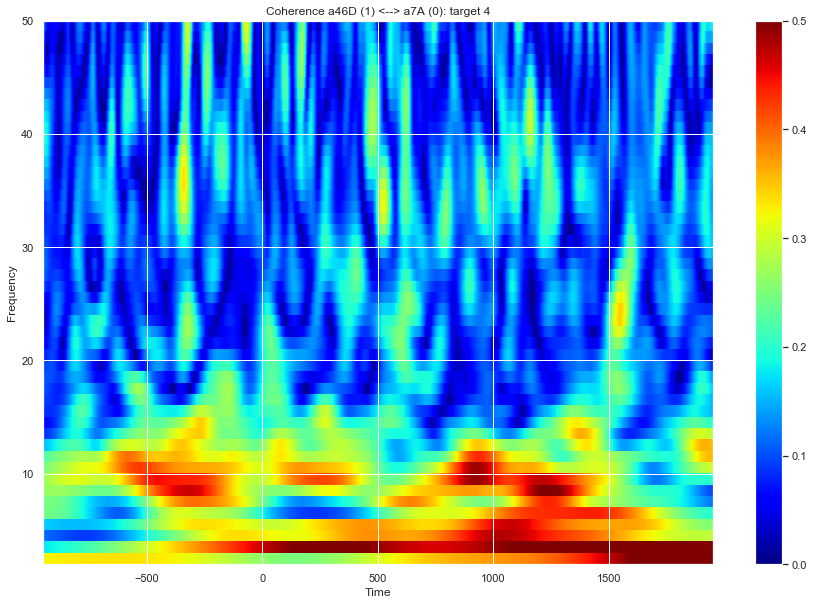

In [28]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[1,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=0.5, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a46D (1) <--> a7A (0): target ' + str(count))
    plt.colorbar()

TypeError: data type not understood

In [73]:
Permuted_data_1 = []
Permuted_data_2 = []
Permuted_data_3 = []
Permuted_data_4 = []
Permuted_data_5 = []

In [86]:
for count, target, in enumerate (targets) : 
    if target == 0. :
        Permuted_data_1.append (data[count,:,:])
    elif target == 1.0 :
        Permuted_data_2.append (data[count,:,:])
    elif target == 2.0 :
        Permuted_data_3.append (data[count,:,:])
    elif target == 3.0 :
        Permuted_data_4.append (data[count,:,:])
    elif target == 4.0 :
        Permuted_data_5.append (data[count,:,:])

In [88]:
Permuted_data_1 = np.array([Permuted_data_1])
Permuted_data_2 = np.array([Permuted_data_2])
Permuted_data_3 = np.array([Permuted_data_3])
Permuted_data_4 = np.array([Permuted_data_4])
Permuted_data_5 = np.array([Permuted_data_5])

In [90]:
Permuted_data_list = [Permuted_data_1,Permuted_data_2,Permuted_data_3,Permuted_data_4,Permuted_data_5]
list_perm = []
list_n_permut = []
list_tail = []
list_n_jobs = []
list_seed = []
list_verbose =[]


for count, Permuted_data_i, in enumerate (Permuted_data_list): 
    perm, n_permut, tail, n_jobs,seed, verbose = mne.stats.permutation_t_test(Permuted_data_i, n_permutations=all, tail=1, n_jobs=1, seed=None, verbose=None)
    
    list_perm.append (perm)
    list_n_permut.append(n_permut)
    list_tail.append(tail) 
    list_n_jobs.append(n_jobs)
    list_sedd.append(seed)
    list_verbose.append(verbose)
    


ValueError: too many values to unpack (expected 2)

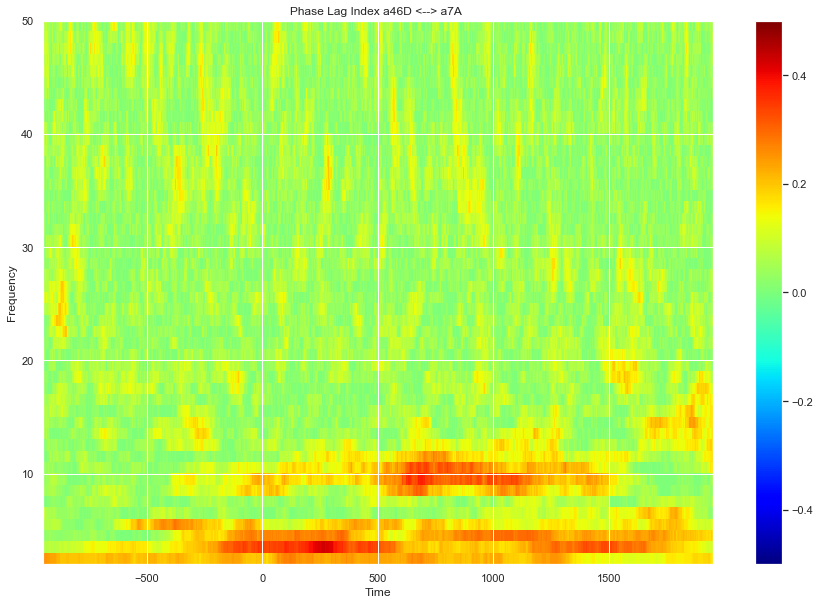

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[1,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-0.5, vmax=0.5, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a46D <--> a7A ')
plt.colorbar()

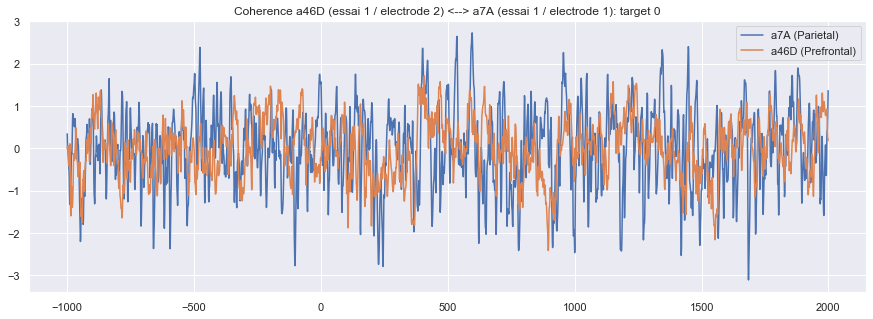

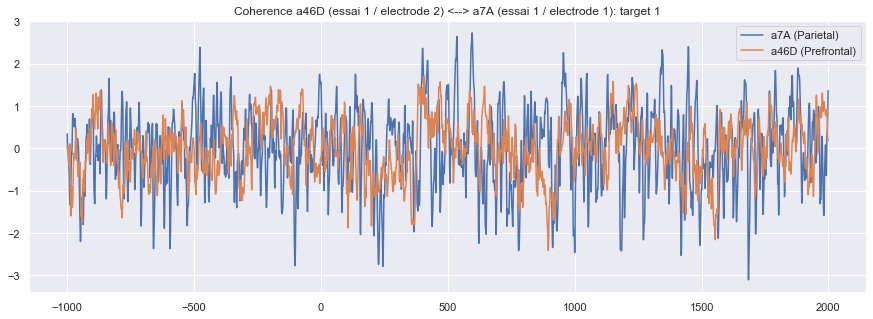

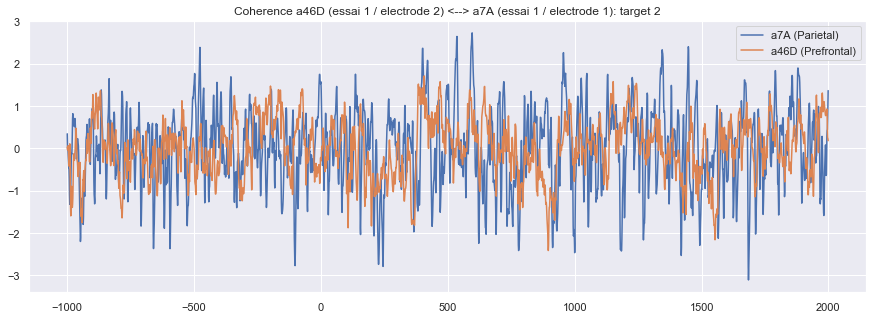

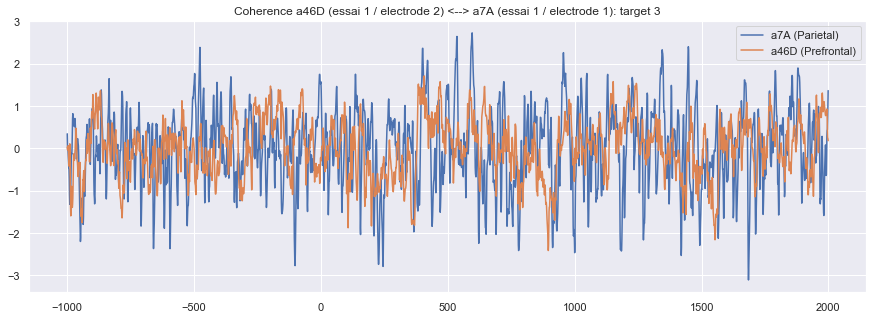

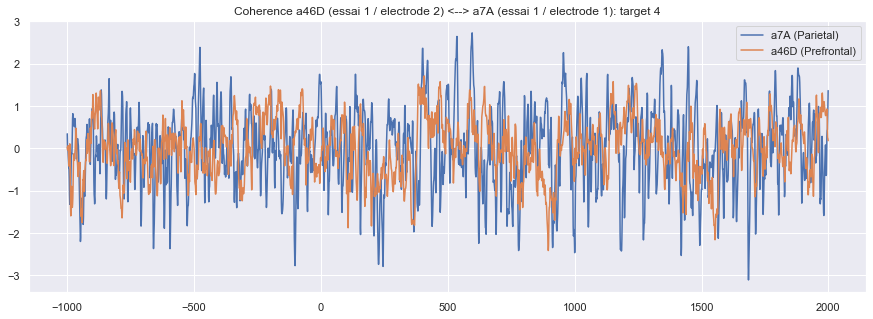

In [30]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(-1000,2000), data[0,0,:], label='a7A (Parietal)')
    plt.plot(np.arange(-1000,2000), data[0,1,:], label='a46D (Prefrontal)')
    plt.plot([0,0],[-2e-4,2e-4],'k--')
    plt.plot([500,500],[-2e-4,2e-4],'k--')
    plt.title('Coherence a46D (essai 1 / electrode 2) <--> a7A (essai 1 / electrode 1): target ' + str(count))
    plt.legend()


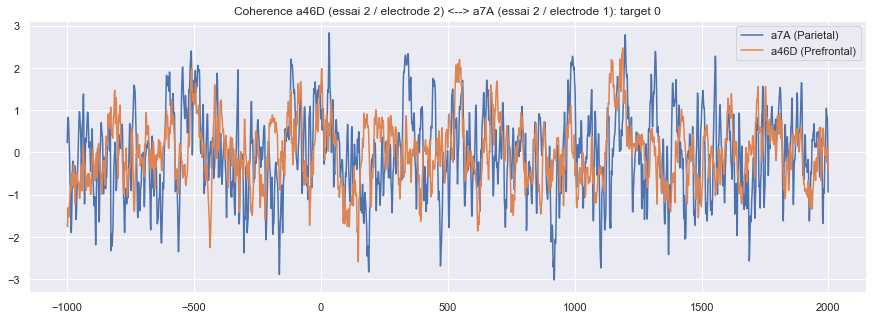

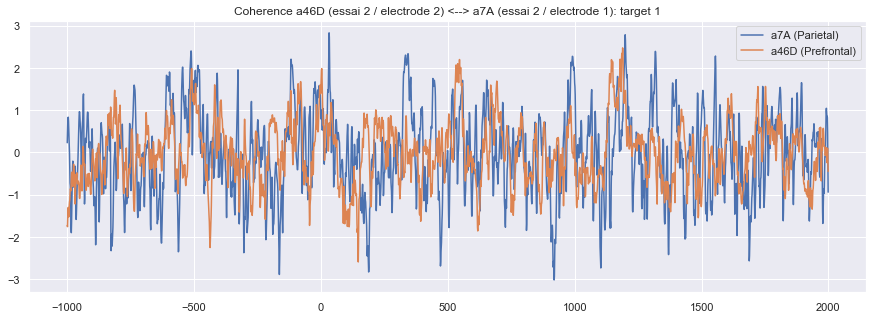

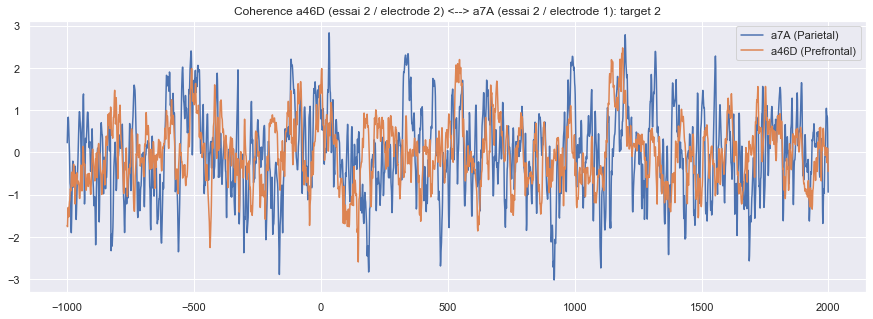

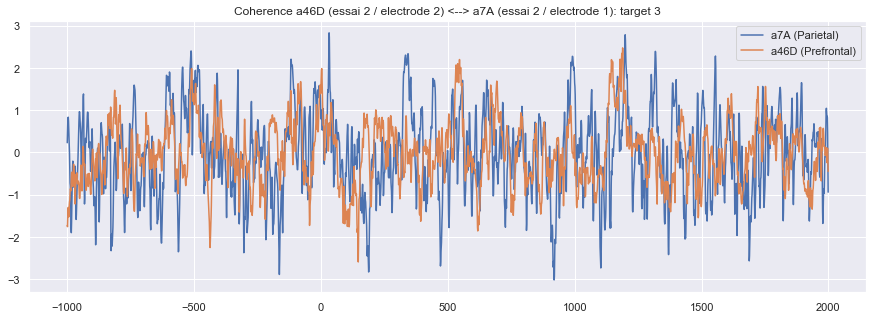

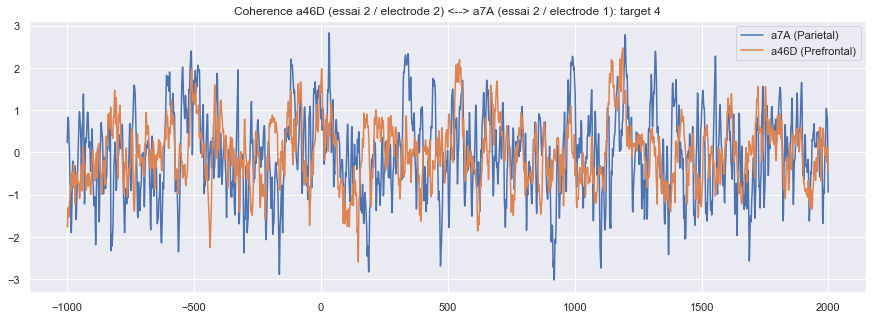

In [31]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(-1000,2000), data[1,0,:], label='a7A (Parietal)')
    plt.plot(np.arange(-1000,2000), data[1,1,:], label='a46D (Prefrontal)')
    plt.plot([0,0],[-2e-4,2e-4],'k--')
    plt.plot([500,500],[-2e-4,2e-4],'k--')
    plt.title('Coherence a46D (essai 2 / electrode 2) <--> a7A (essai 2 / electrode 1): target ' + str(count))
    plt.legend()


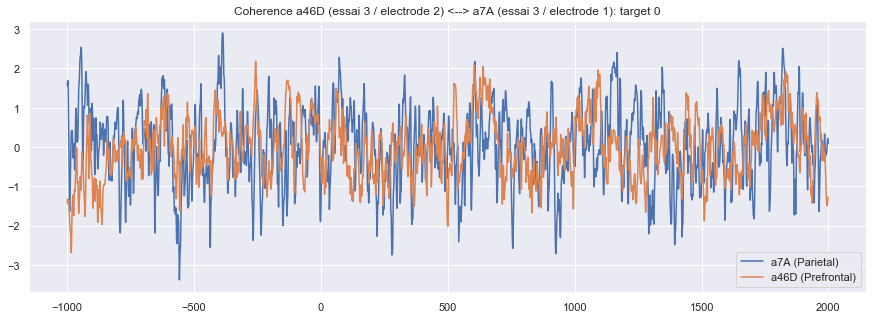

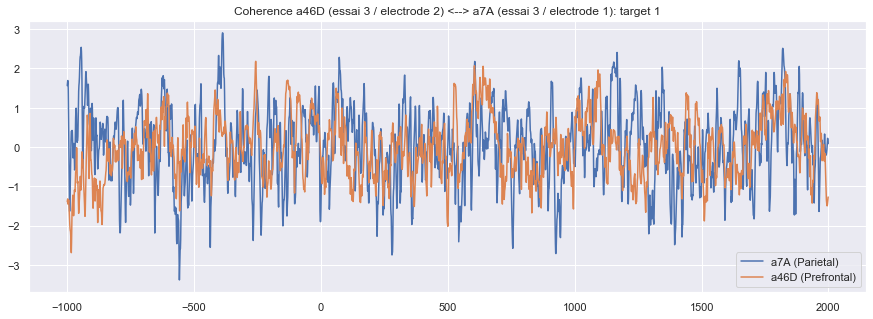

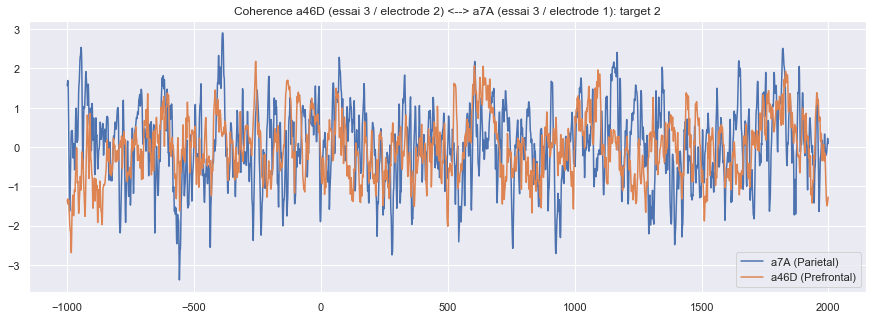

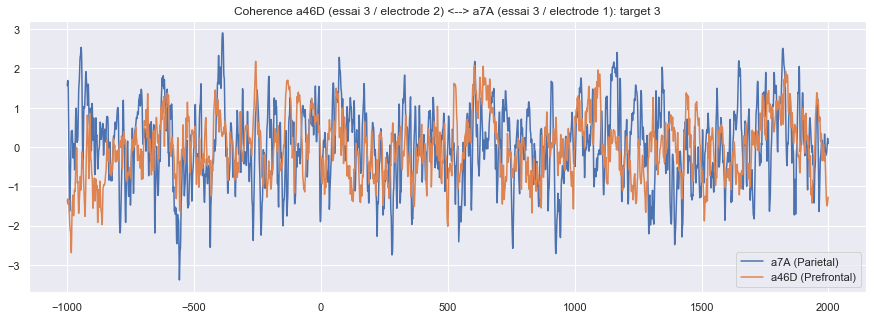

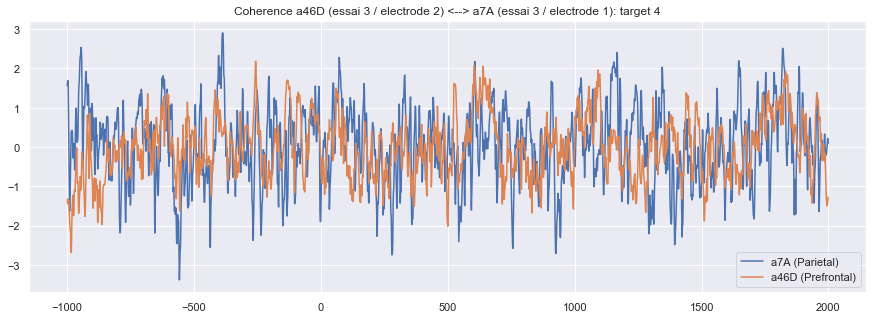

In [32]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(-1000,2000), data[2,0,:], label='a7A (Parietal)')
    plt.plot(np.arange(-1000,2000), data[2,1,:], label='a46D (Prefrontal)')
    plt.plot([0,0],[-2e-4,2e-4],'k--')
    plt.plot([500,500],[-2e-4,2e-4],'k--')
    plt.title('Coherence a46D (essai 3 / electrode 2) <--> a7A (essai 3 / electrode 1): target ' + str(count))
    plt.legend()


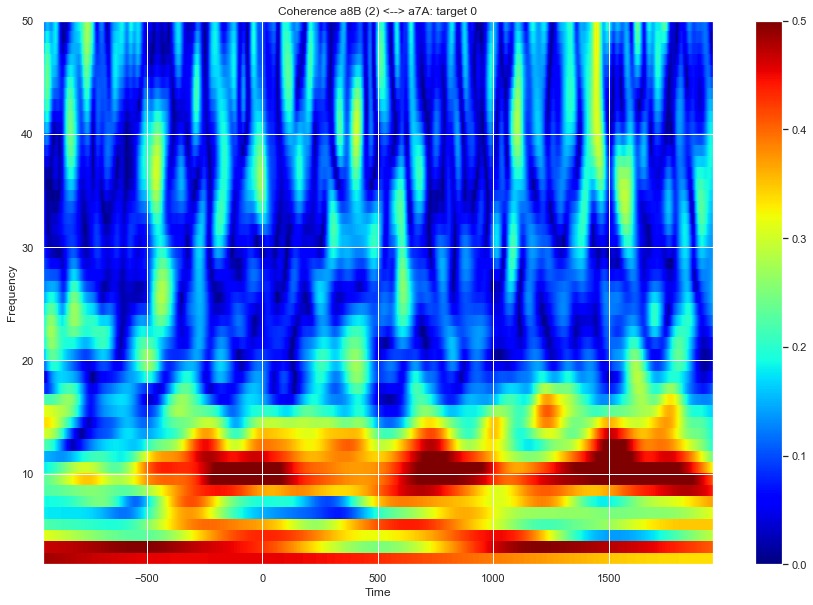

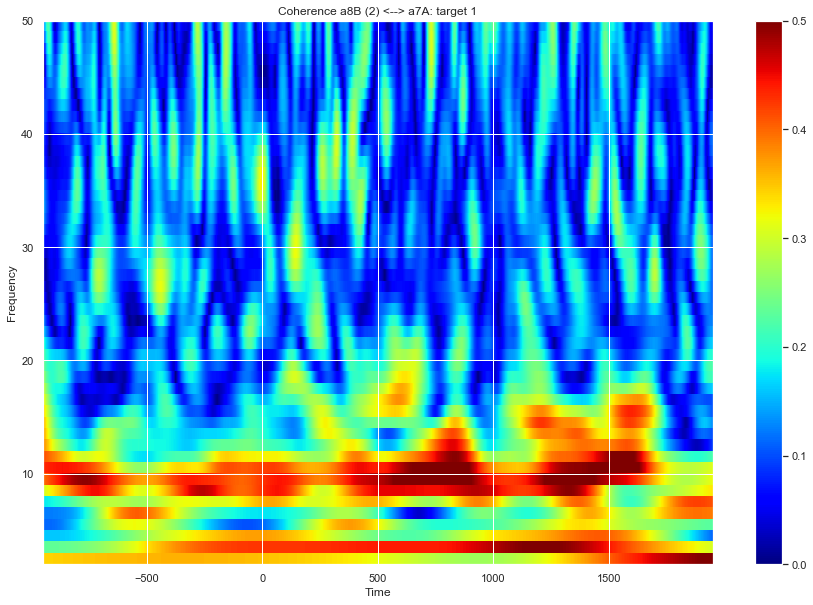

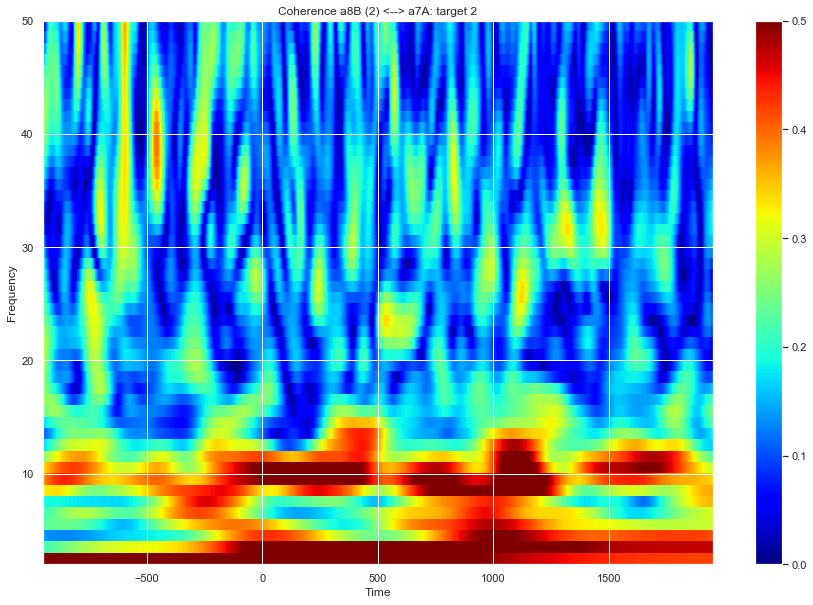

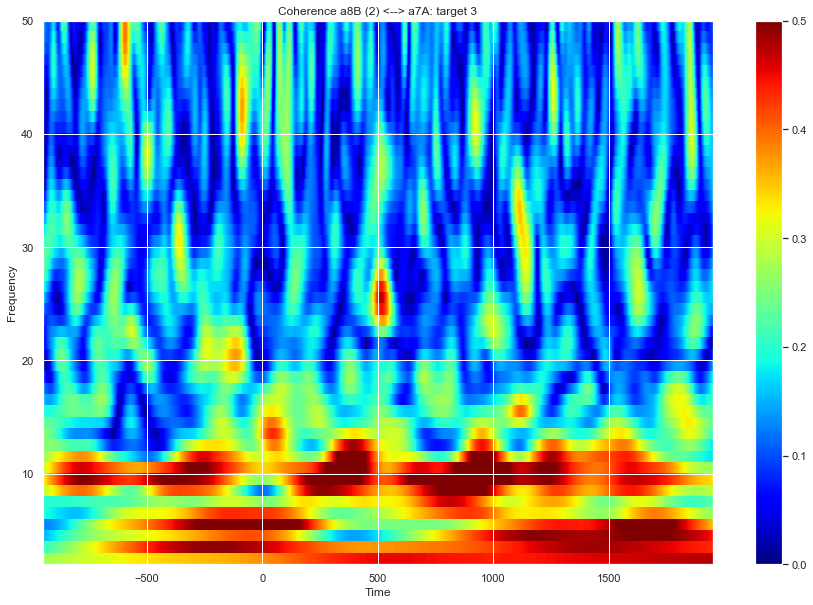

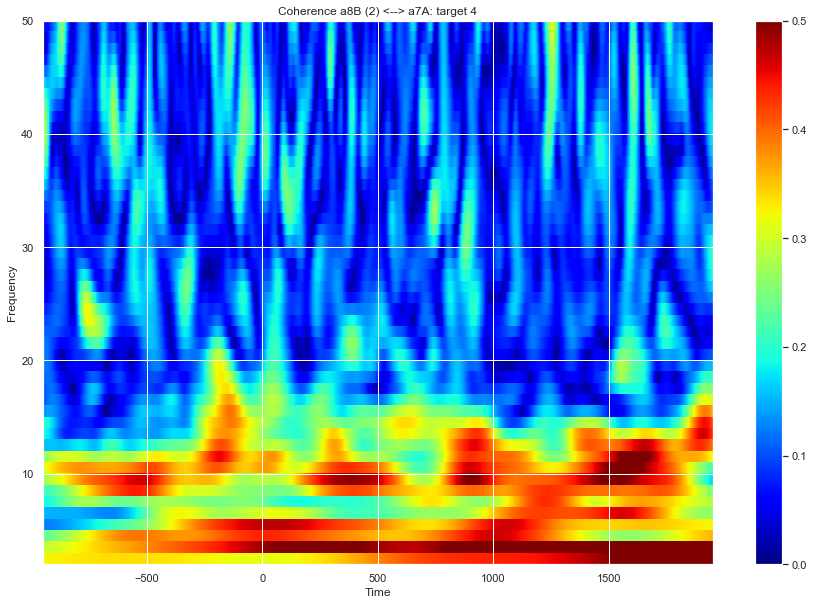

In [33]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[2,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=0.5, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (2) <--> a7A: target ' + str(count))
    plt.colorbar()

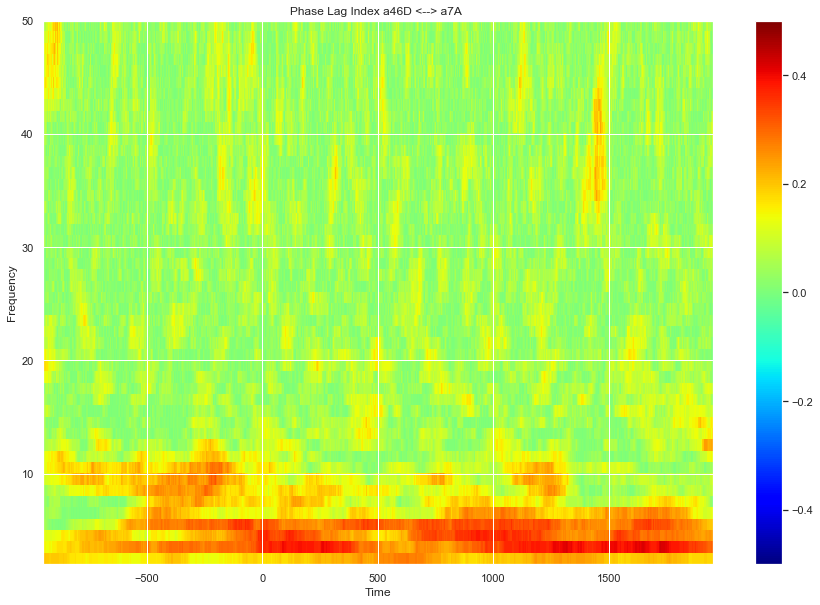

In [34]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[2,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-0.5, vmax=0.5, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a46D <--> a7A ')
plt.colorbar()

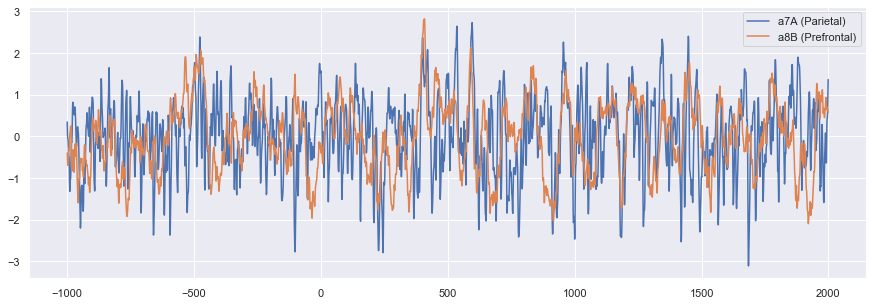

In [35]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[0,0,:], label='a7A (Parietal)')
plt.plot(np.arange(-1000,2000), data[0,2,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.legend()


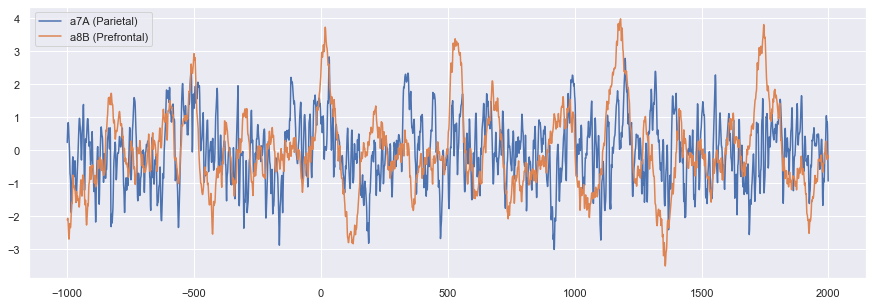

In [36]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[1,0,:], label='a7A (Parietal)')
plt.plot(np.arange(-1000,2000), data[1,2,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.legend()


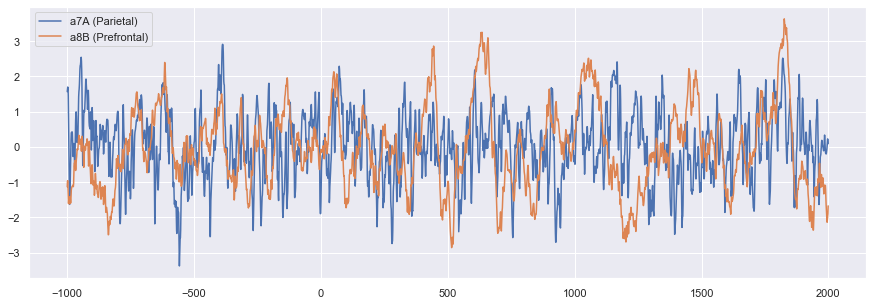

In [37]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[2,0,:], label='a7A (Parietal)')
plt.plot(np.arange(-1000,2000), data[2,2,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.legend()

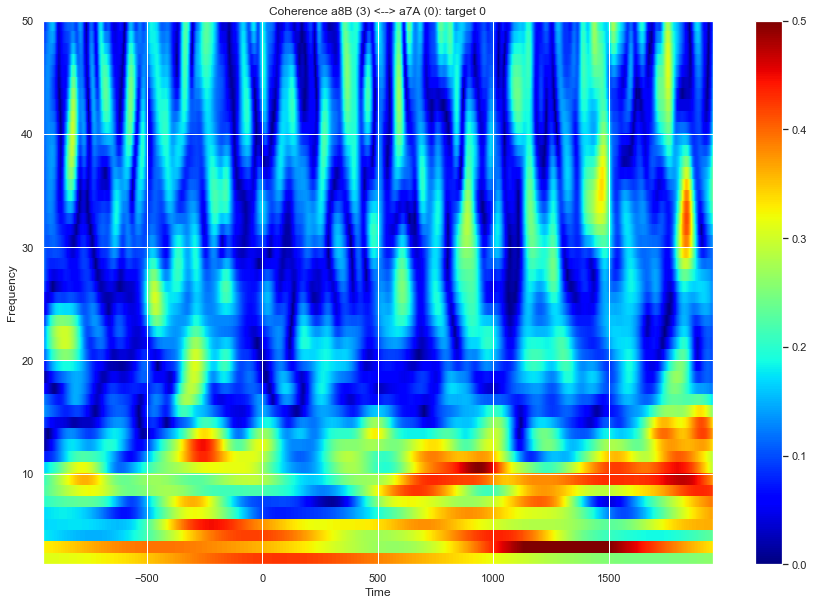

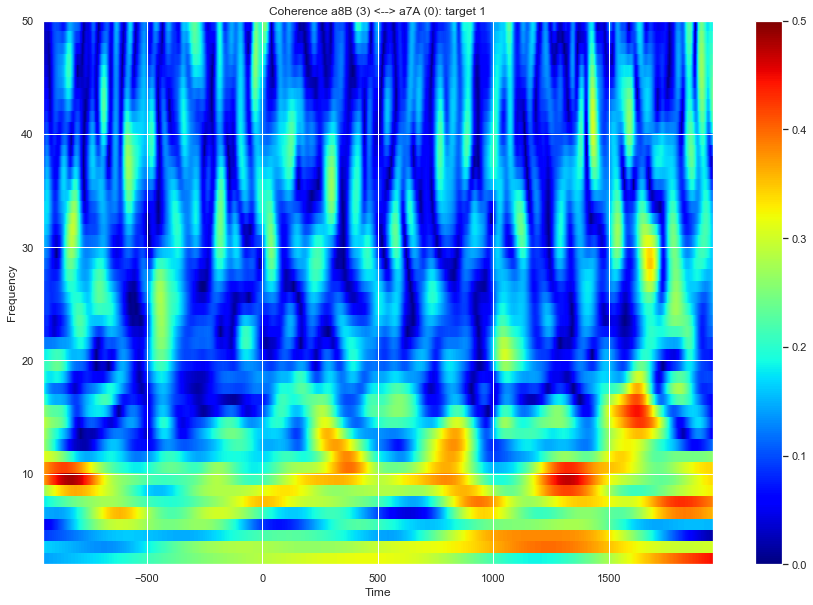

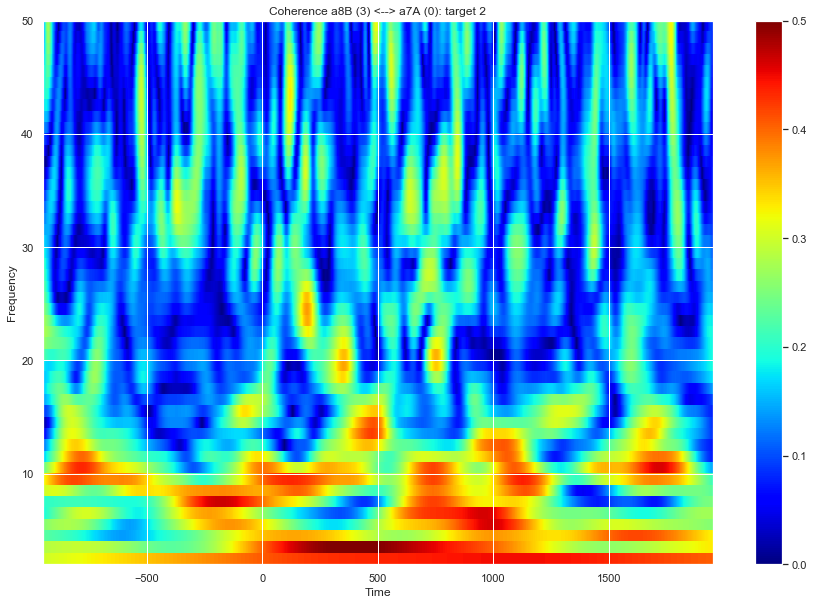

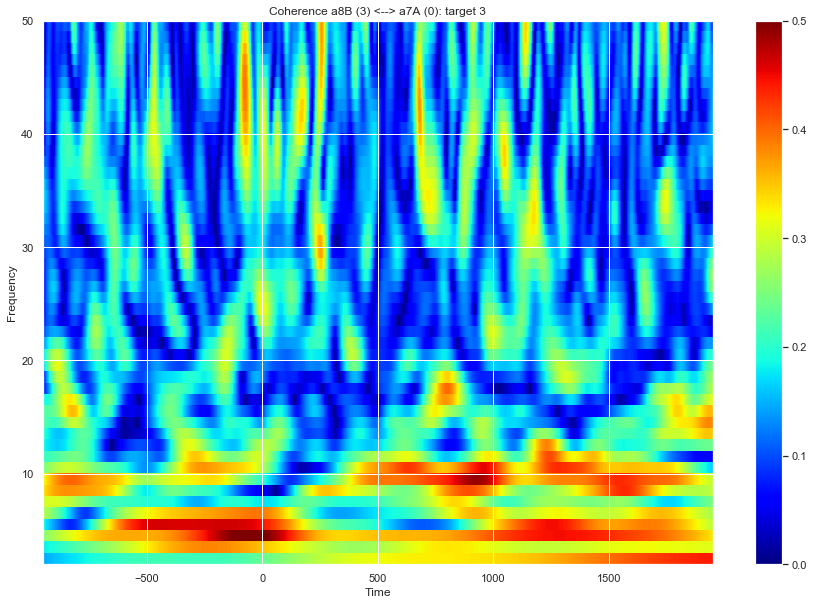

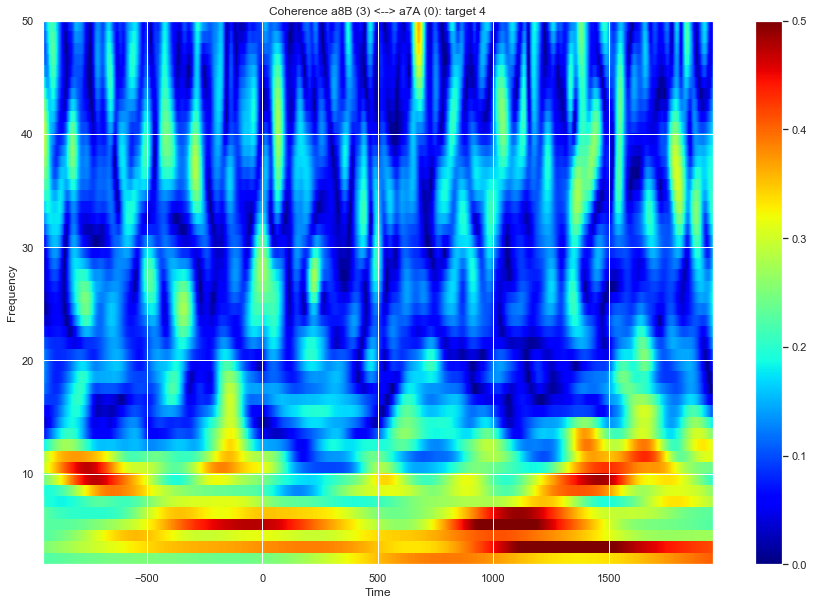

In [38]:
 for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[3,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=0.5, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (3) <--> a7A (0): target ' + str(count))
    plt.colorbar()

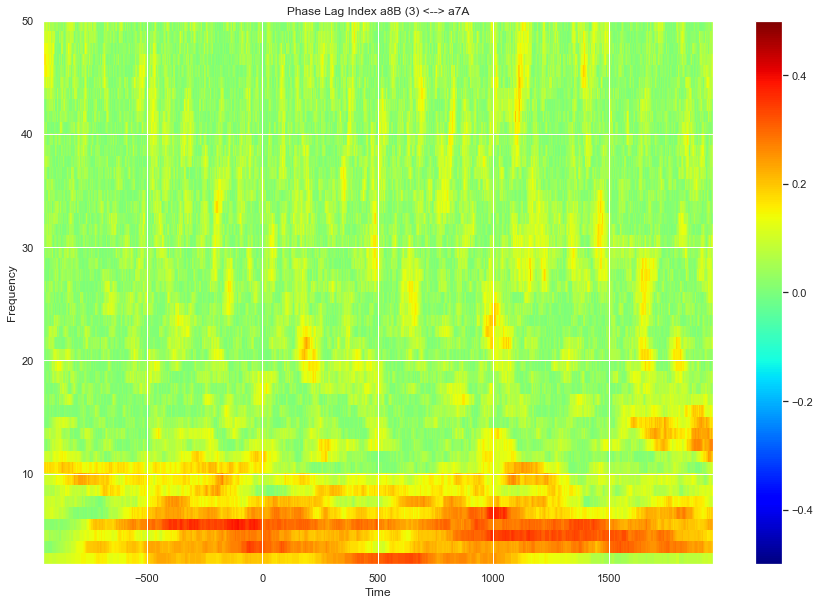

In [39]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[3,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-0.5, vmax=0.5, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (3) <--> a7A' )
plt.colorbar()

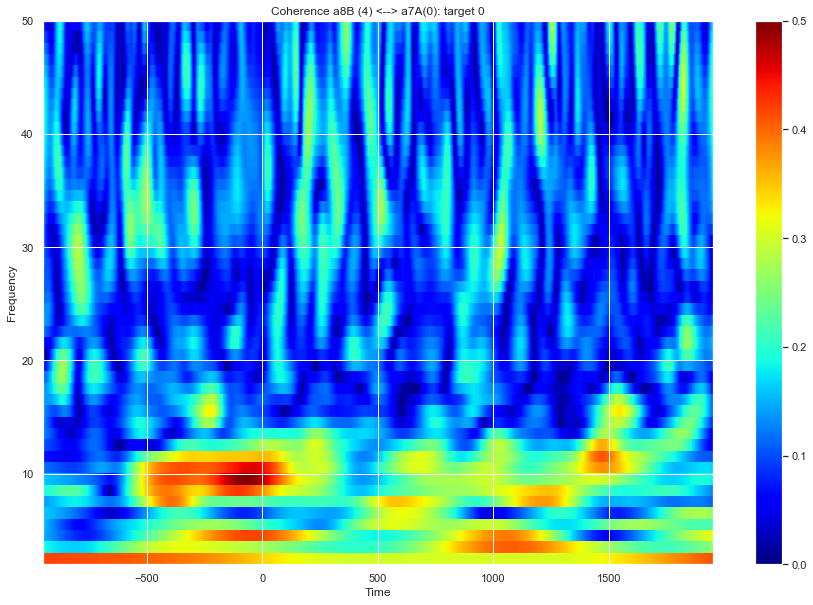

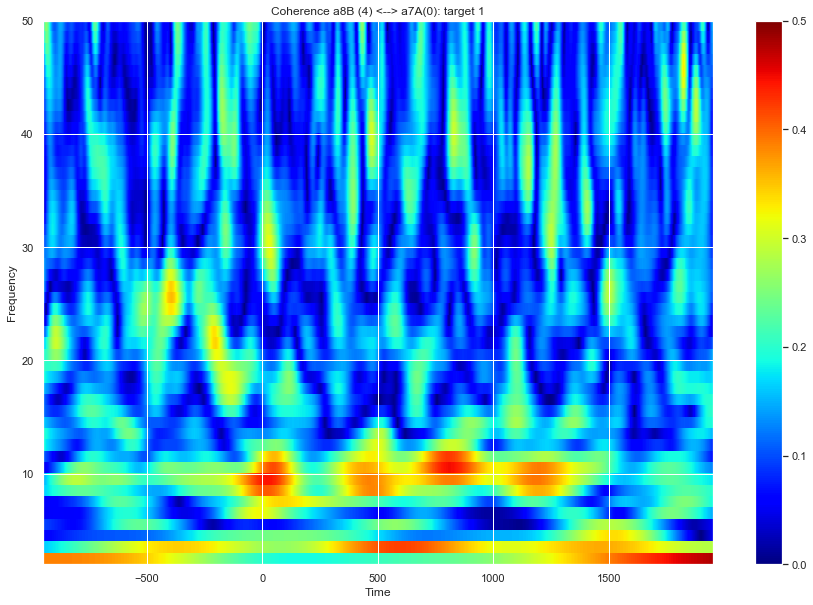

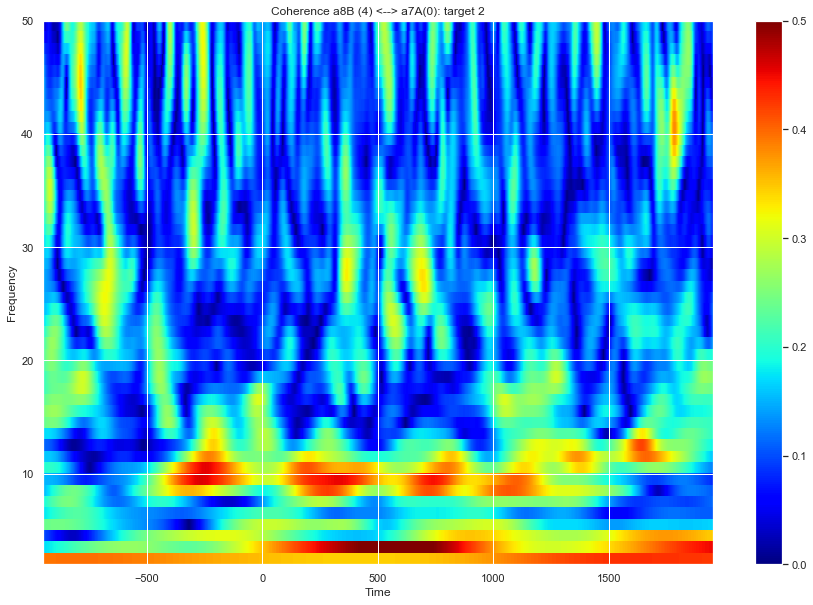

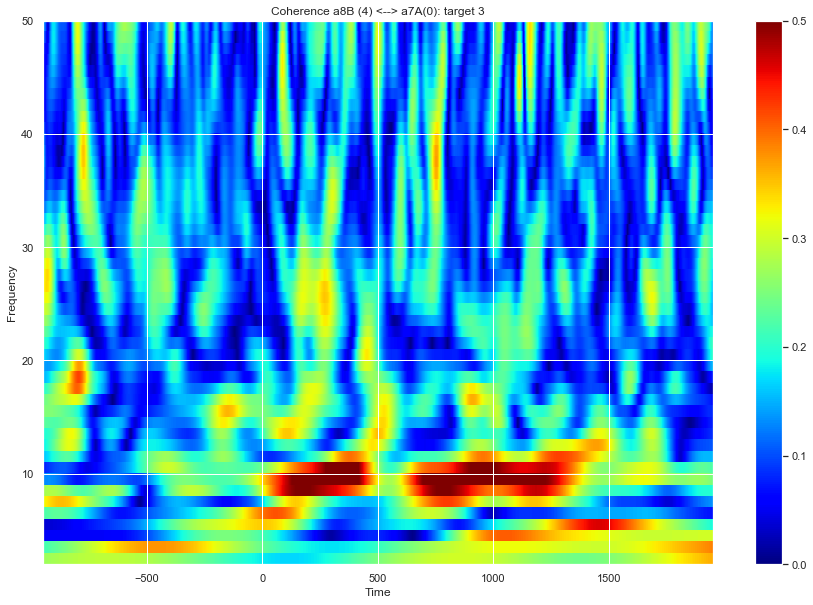

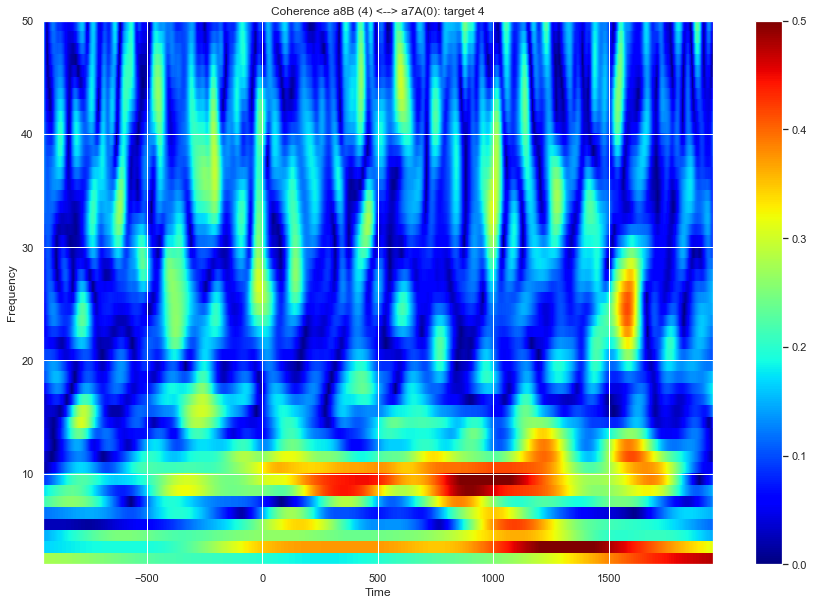

In [40]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[4,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=0.5, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (4) <--> a7A(0): target ' + str(count))
    plt.colorbar()

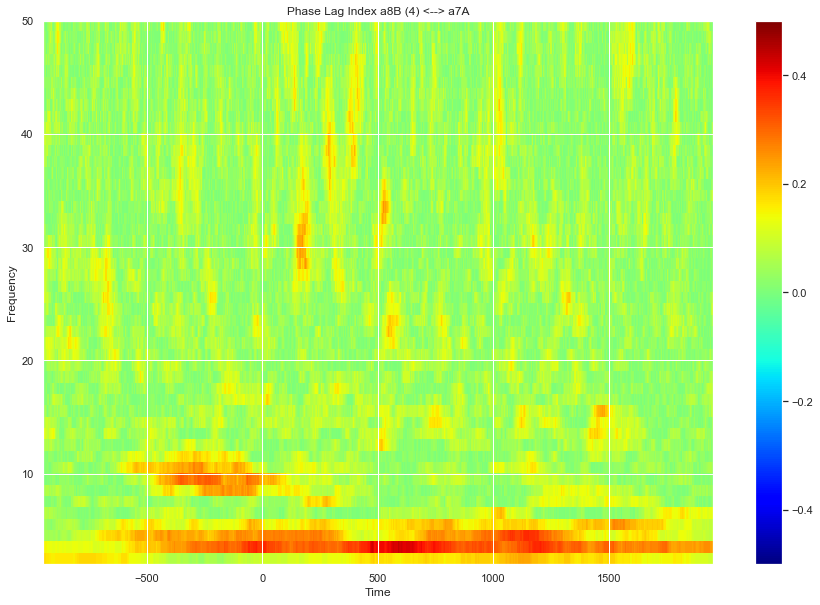

In [41]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[4,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-0.5, vmax=0.5, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (4) <--> a7A')
plt.colorbar()

IndexError: too many indices for array

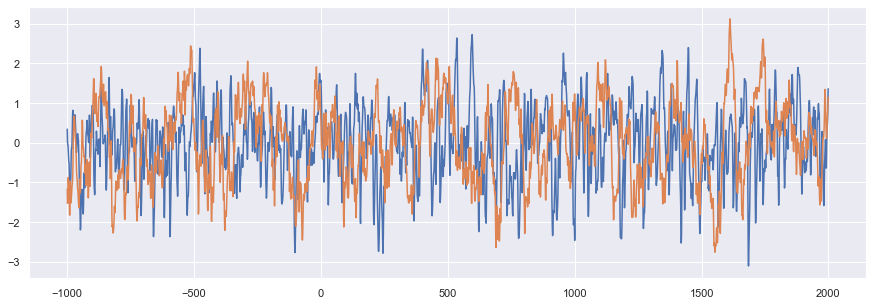

In [42]:
for n_trial in range(10):
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(-1000,2000), data[n_trial,0,:], label='a7A (Parietal)')
    plt.plot(np.arange(-1000,2000), data[n_trial,4,:], label='a8B (Prefrontal)')
    plt.plot([0,0],[-2e-4,2e-4],'k--')
    plt.plot([500,500],[-2e-4,2e-4],'k--')
    target = np.where(targets[n_trial,:]==1)[0][0]
    plt.title('trial:' + str(n_trial) + ', target :' + str(target))
    plt.legend()
#erreur : too many indices for array ??? 


In [ ]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[5,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=0.5, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (5) <--> a7A(0): target ' + str(count))
    plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[5,0,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-0.4, vmax=0.4, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (5) <--> a7A')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[3,0,:], label='a7A (Parietal)')
plt.plot(np.arange(-1000,2000), data[3,5,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.legend()


# Nonspecific stimulus intra frontal coherence : a8B --> a46D

In [ ]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[2,1,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (2) <--> a46D (1): target ' + str(count))
    plt.colorbar()

In [ ]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[3,1,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (3) <--> a46D(1): target ' + str(count))
    plt.colorbar()

In [ ]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[4,1,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (4) <--> a46D(1): target ' + str(count))
    plt.colorbar()

In [ ]:
for count, con in enumerate (list_con):
    plt.figure(figsize=(15,10))
    plt.imshow(con[5,1,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Coherence a8B (5) <--> a46D(1): target ' + str(count))
    plt.colorbar()

# a8B --> a8B

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[3,2,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (3) <--> a8B (2)')
plt.colorbar()

In [ ]:
i=0
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[i,2,:], label='a8B (Prefrontal)')
plt.plot(np.arange(-1000,2000), data[i,3,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.title('target :' + str(int(targets[i])))
plt.legend()


In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[4,2,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (4) <--> a8B (2)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[4,2,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-1, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (4) <--> a8B (2)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[4,3,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (4) <--> a8B (3)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[4,3,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-1, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (4) <--> a8B (3)')
plt.colorbar()

In [ ]:
i=0
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[i,3,:], label='a8B (Prefrontal)')
plt.plot(np.arange(-1000,2000), data[i,4,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.title('target :' + str(int(targets[i])))
plt.legend()



In [ ]:
i=1
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[i,3,:], label='a8B (Prefrontal)')
plt.plot(np.arange(-1000,2000), data[i,4,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.title('target :' + str(int(targets[i])))
plt.legend()



In [ ]:
i=2
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[i,3,:], label='a8B (Prefrontal)')
plt.plot(np.arange(-1000,2000), data[i,4,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.title('target :' + str(int(targets[i])))
plt.legend()



In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[5,2,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (5) <--> a8B (2)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(pli_con[5,2,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=-1, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Phase Lag Index a8B (5) <--> a8B (2)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[5,3,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (5) <--> a8B (3)' )
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(con[5,4,:,51:-50], origin='lower', aspect='auto', extent=[-950, 1950, 2, 50], vmin=0, vmax=1, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Coherence a8B (5) <--> a8B (4)')
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-1000,2000), data[0,4,:], label='a8B (Prefrontal)')
plt.plot(np.arange(-1000,2000), data[0,5,:], label='a8B (Prefrontal)')
plt.plot([0,0],[-2e-4,2e-4],'k--')
plt.plot([500,500],[-2e-4,2e-4],'k--')
plt.legend()


In [ ]:
data.shape

In [ ]:
con[2,1,:,51:-50].shape